<a href="https://colab.research.google.com/github/Avinash8901/mushroom_classification_using_ml/blob/main/mushroom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import pickle
from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
file=files.upload()


Saving mushrooms.csv to mushrooms.csv


In [ ]:
df=pd.read_csv(io.BytesIO(file['mushrooms.csv']))

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df.isnull().sum()
df['class']

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [ ]:
df['class'].unique()

array(['p', 'e'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


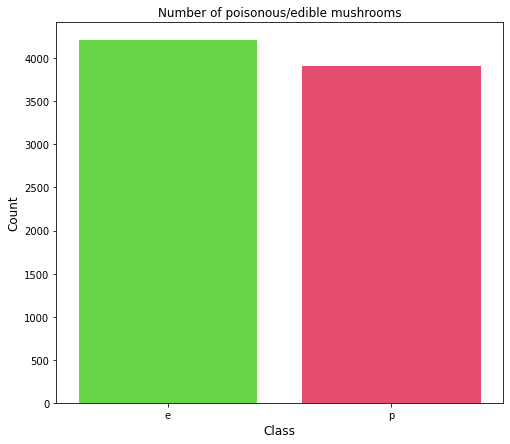

In [ ]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

Preprocessing:


1.   Missing Values
2.   Inconsistent data :- data which has no impact
3.   Univariate Analysis
4.   Multivariate Analysis



In [ ]:
#missing Values
df.isnull().sum()
#no missing values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
col=df.columns
for i in col:
  li=list(df[i].unique())
  li.sort()
  print(i,"values are",li)
#here stalk-root there is a '?' which says data is inconsistent

class values are ['e', 'p']
cap-shape values are ['b', 'c', 'f', 'k', 's', 'x']
cap-surface values are ['f', 'g', 's', 'y']
cap-color values are ['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y']
bruises values are ['f', 't']
odor values are ['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y']
gill-attachment values are ['a', 'f']
gill-spacing values are ['c', 'w']
gill-size values are ['b', 'n']
gill-color values are ['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y']
stalk-shape values are ['e', 't']
stalk-root values are ['?', 'b', 'c', 'e', 'r']
stalk-surface-above-ring values are ['f', 'k', 's', 'y']
stalk-surface-below-ring values are ['f', 'k', 's', 'y']
stalk-color-above-ring values are ['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']
stalk-color-below-ring values are ['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']
veil-type values are ['p']
veil-color values are ['n', 'o', 'w', 'y']
ring-number values are ['n', 'o', 't']
ring-type values are ['e', 'f', 'l', 'n', 'p']
spore-print-

In [ ]:
df['stalk-root'].replace('?','b',inplace=True)
#we can replace ? with b as it is the most repeated elemented
df['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [ ]:
col=df.columns
for i in col:
  if len(df[i].value_counts())==1:
    print(i,"has no Impact because it has only one value")
    df.drop(i,axis=1,inplace=True)

veil-type has no Impact because it has only one value


<ipython-input-14-a11df6ea8845>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


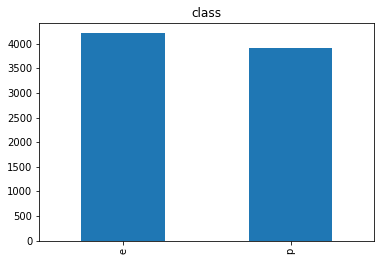

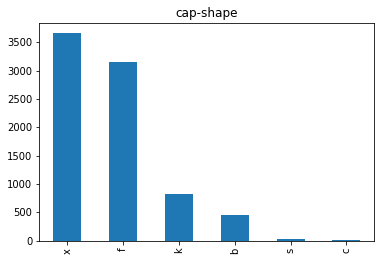

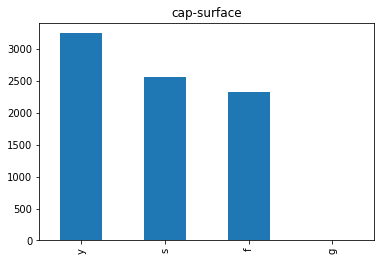

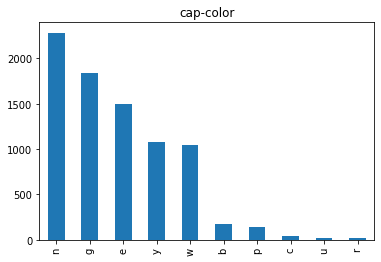

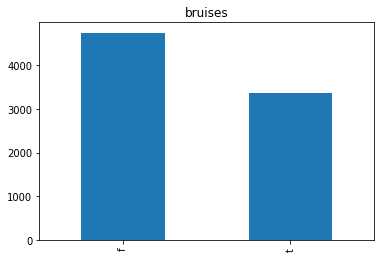

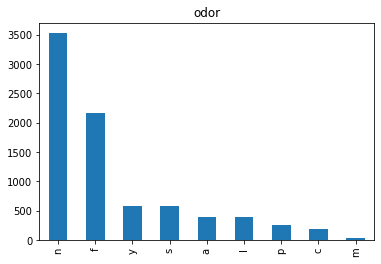

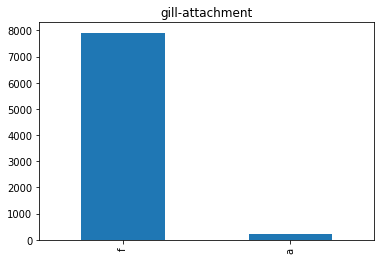

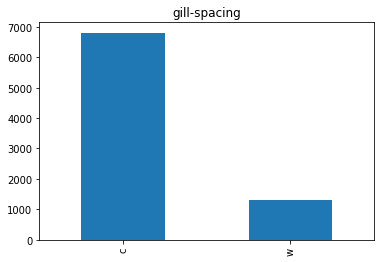

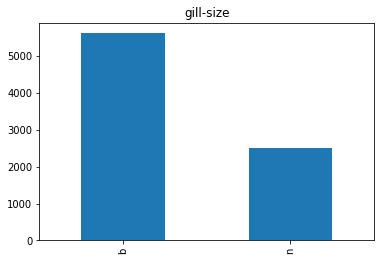

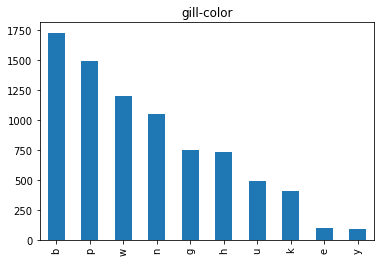

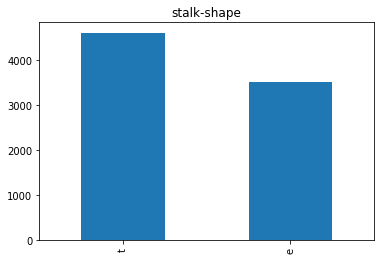

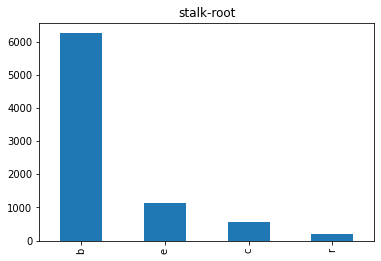

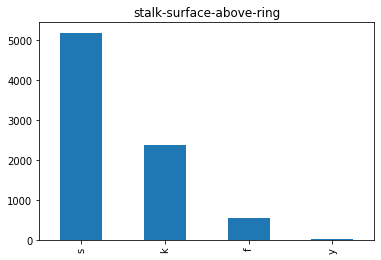

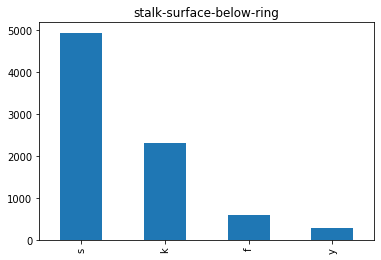

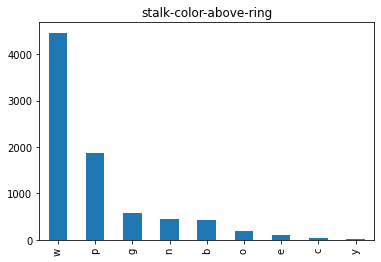

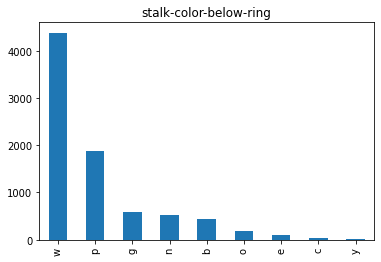

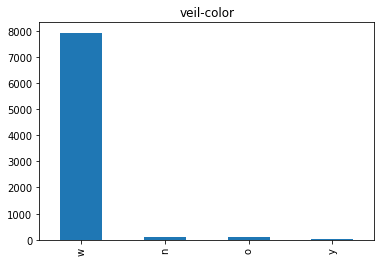

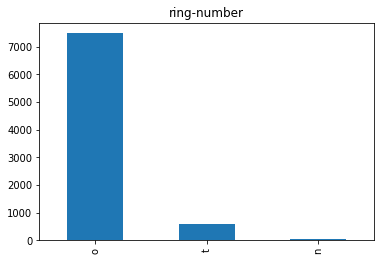

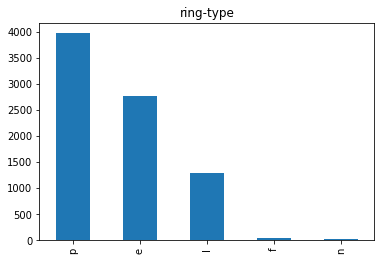

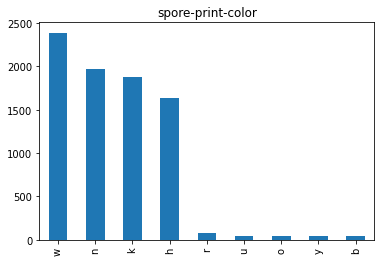

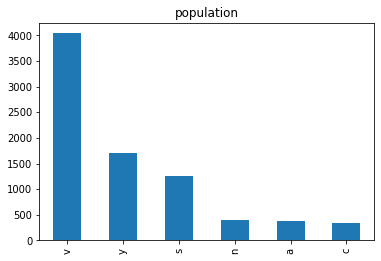

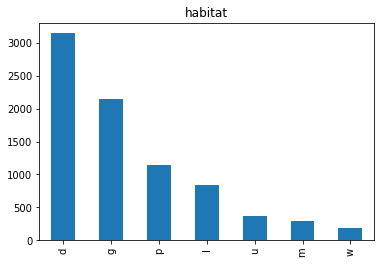

In [ ]:
for i in df.columns:
  plt.figure(i)
  plt.title(i)
  df[i].value_counts()[:10].plot(kind='bar')

<ipython-input-15-2658731feeec>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,15))


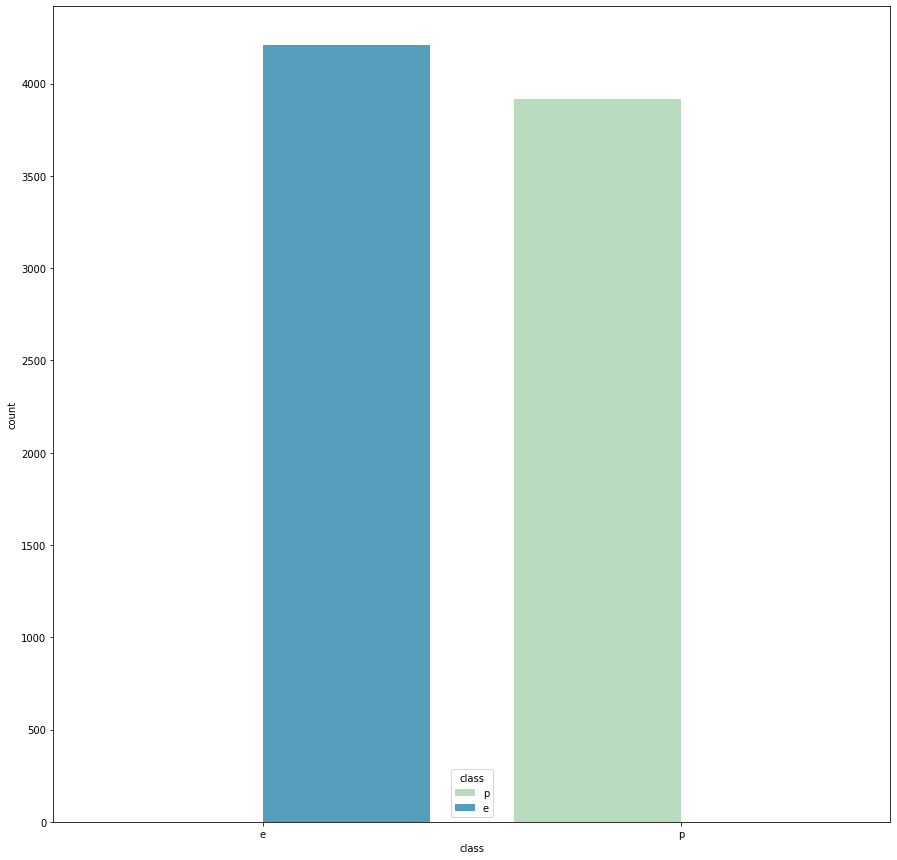

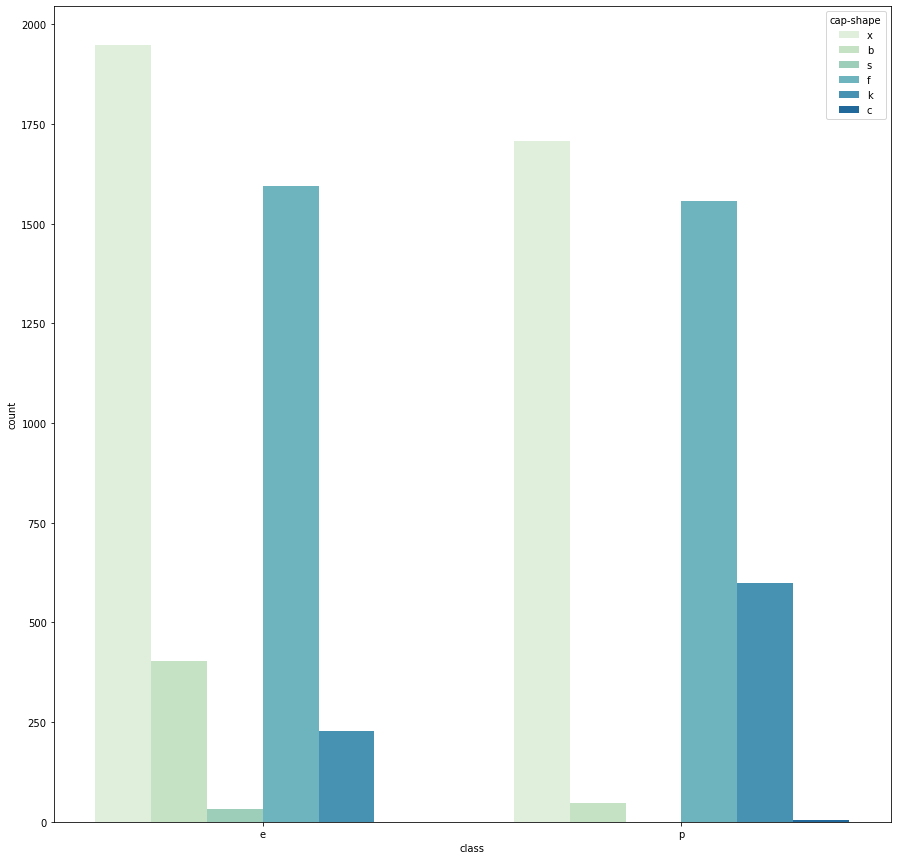

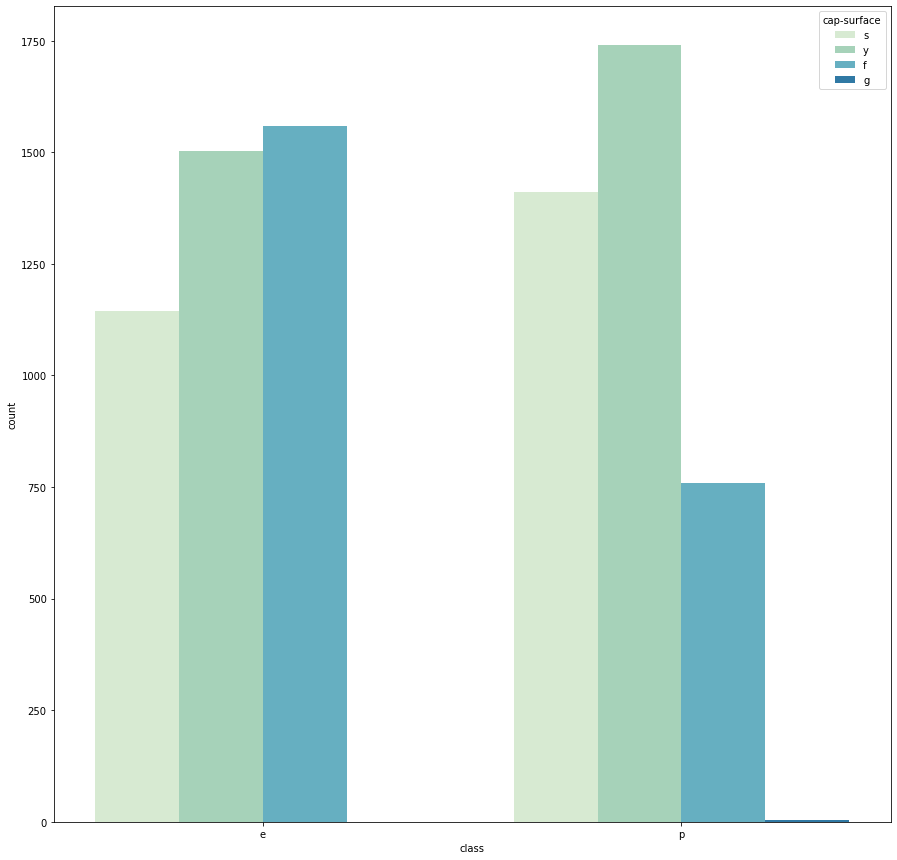

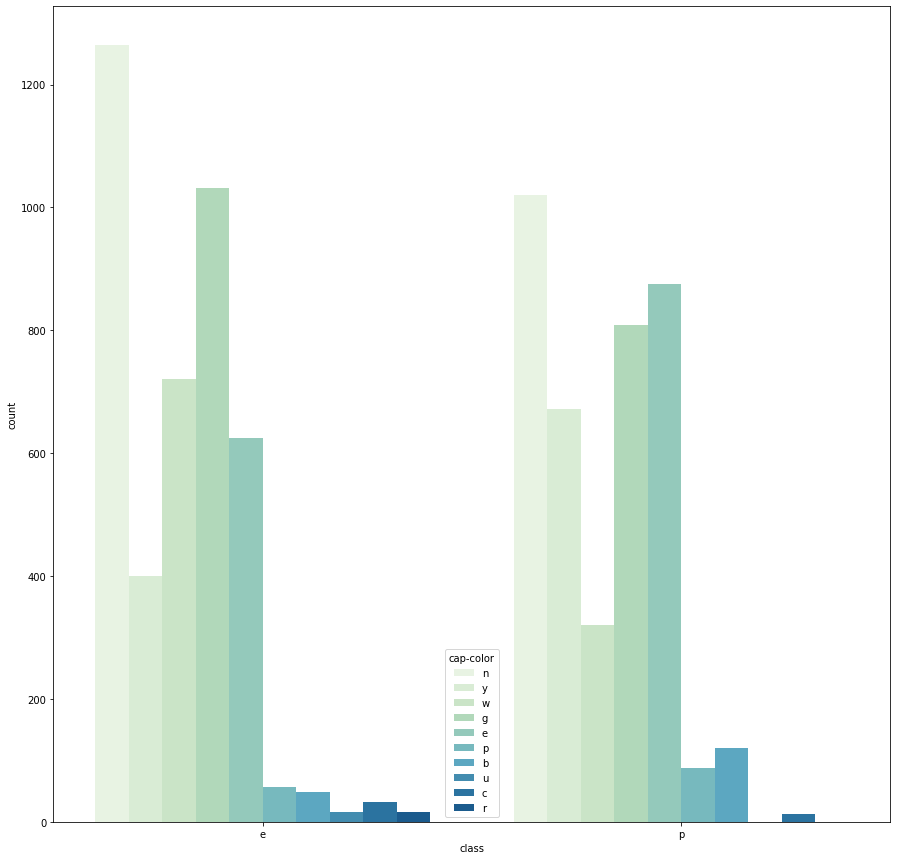

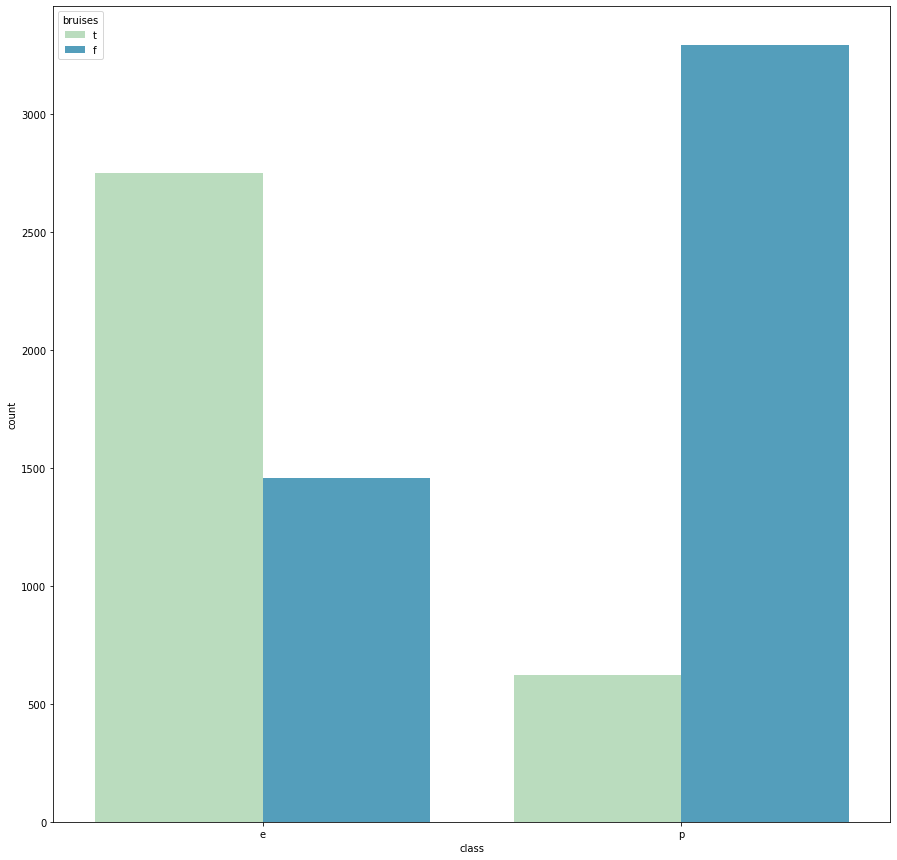

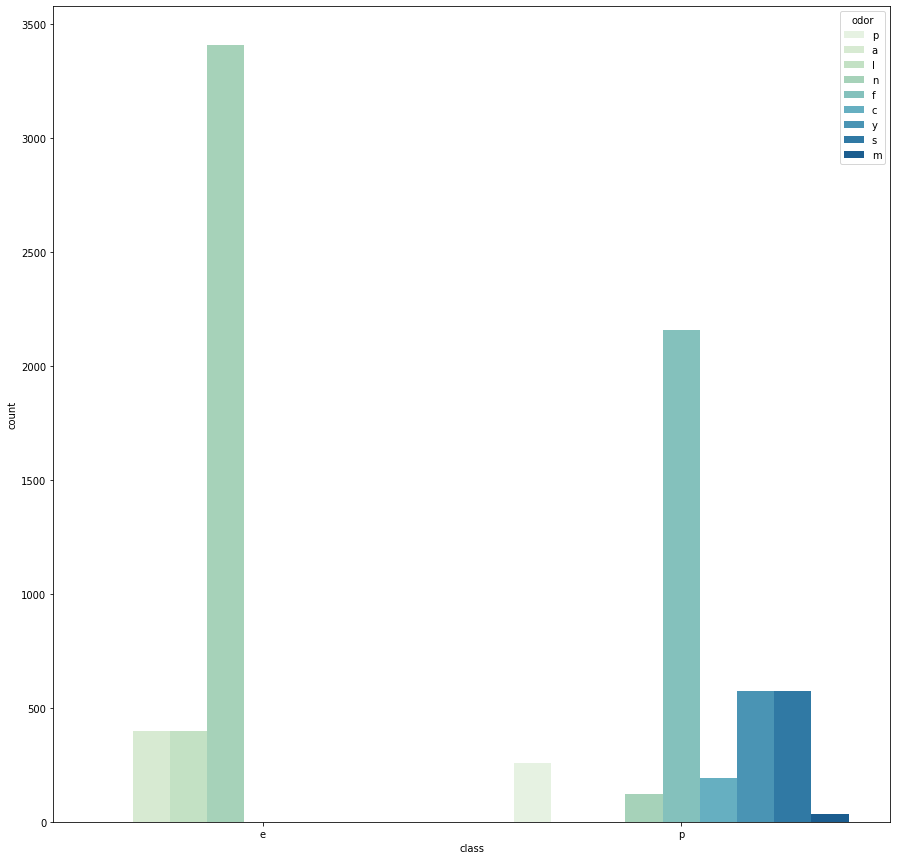

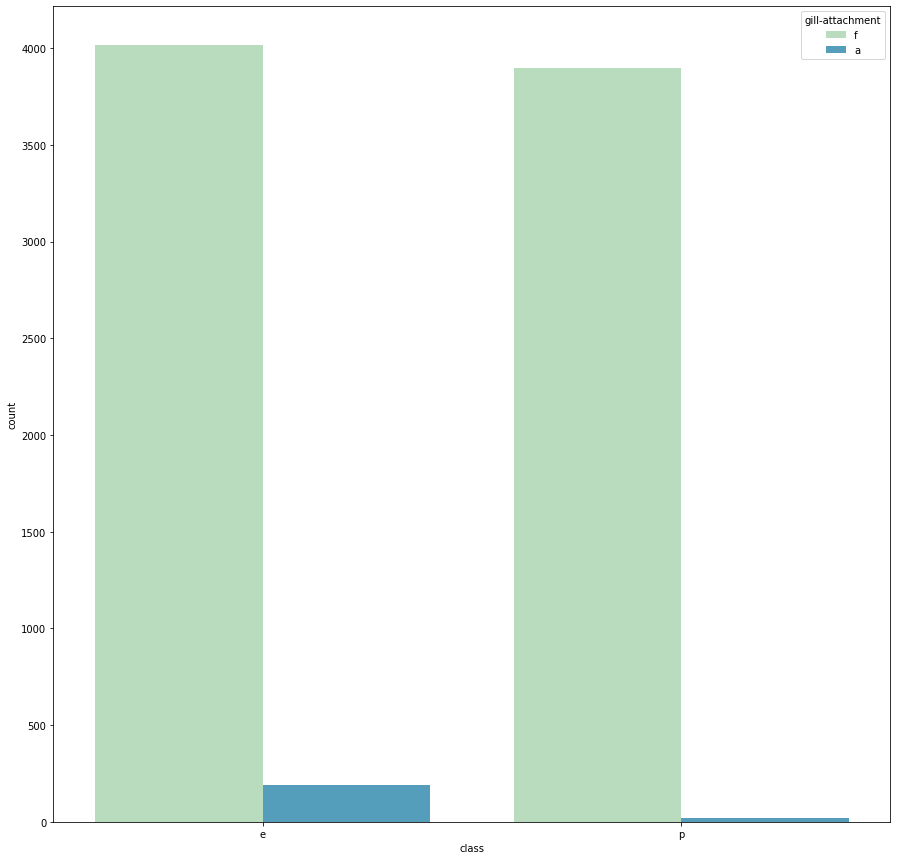

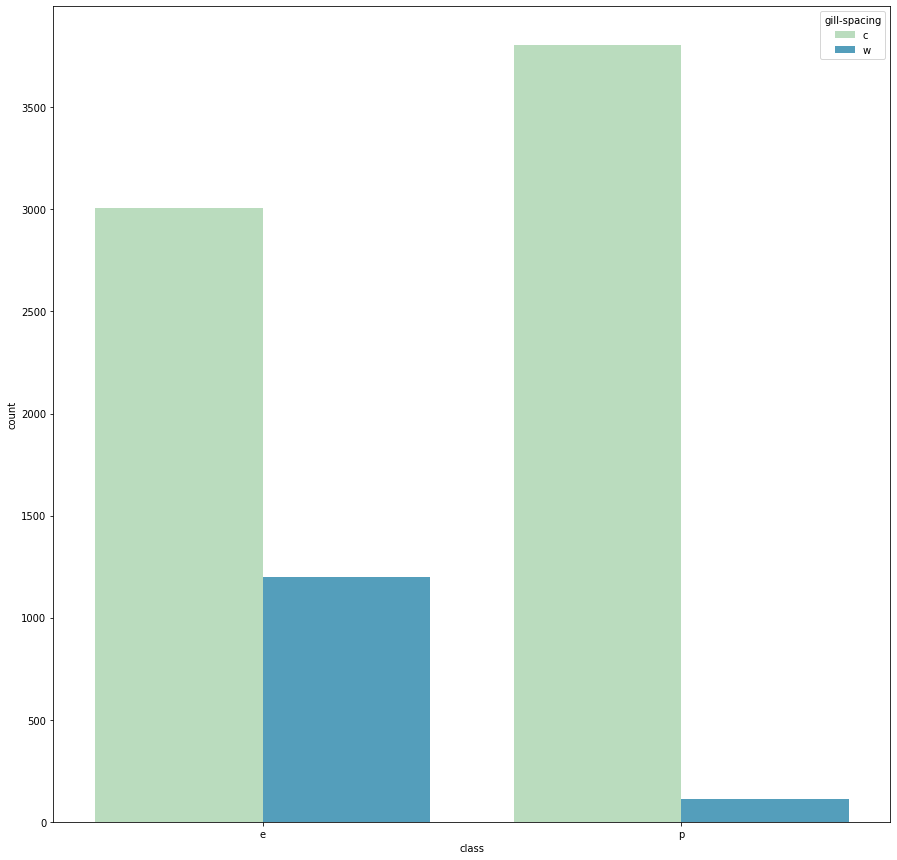

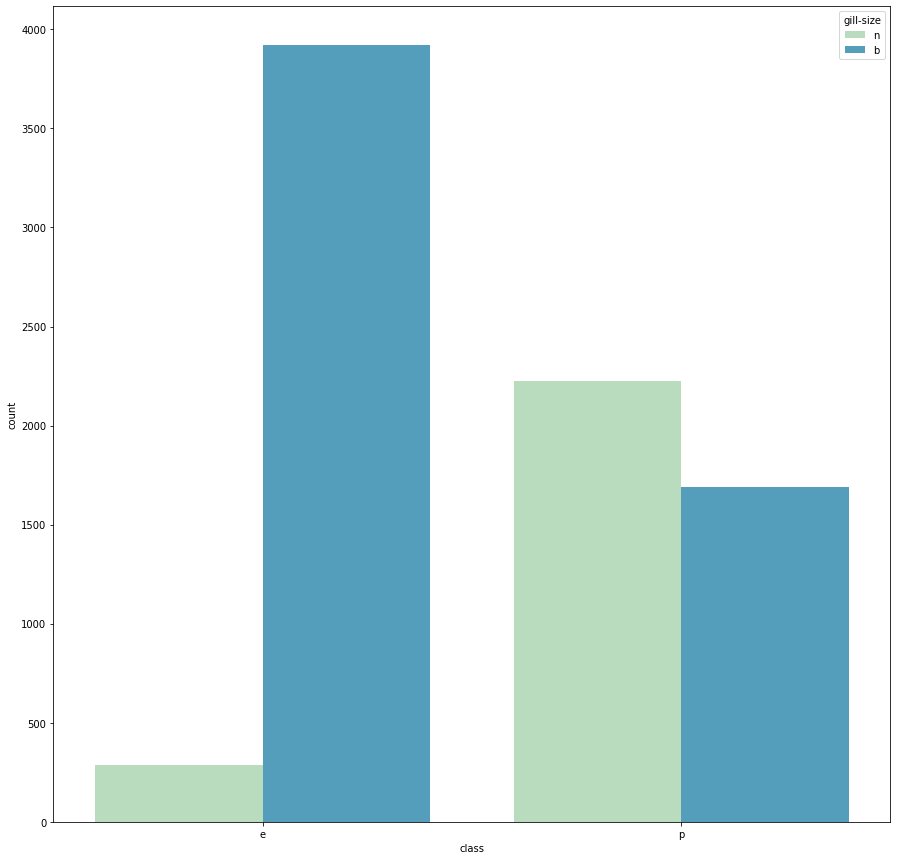

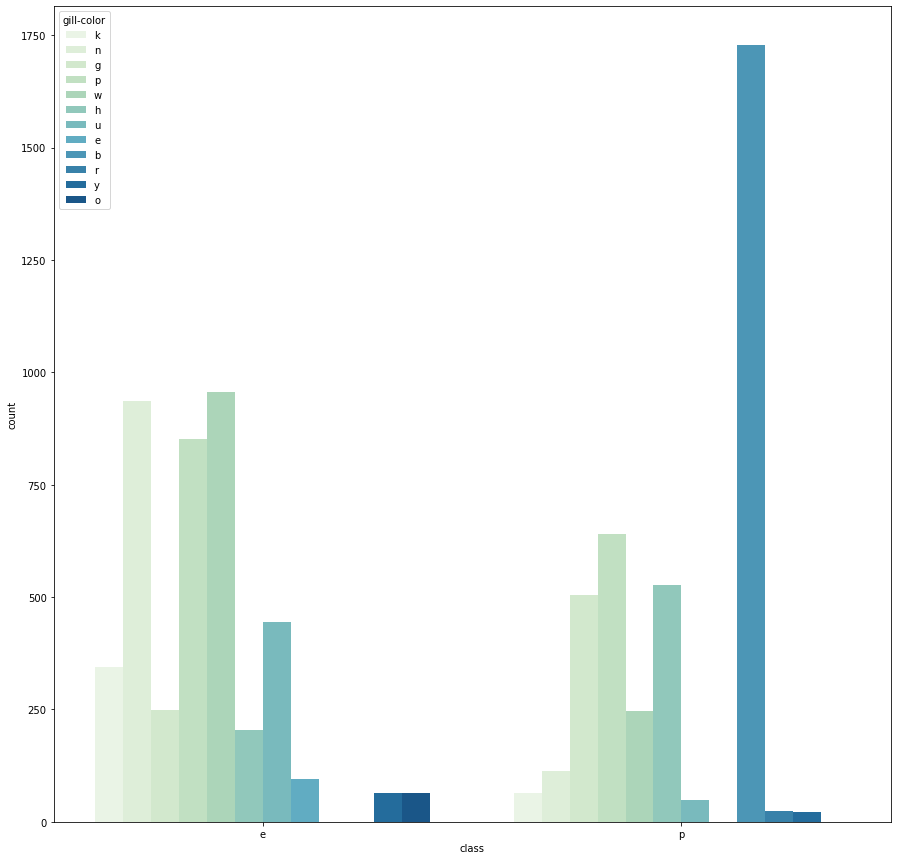

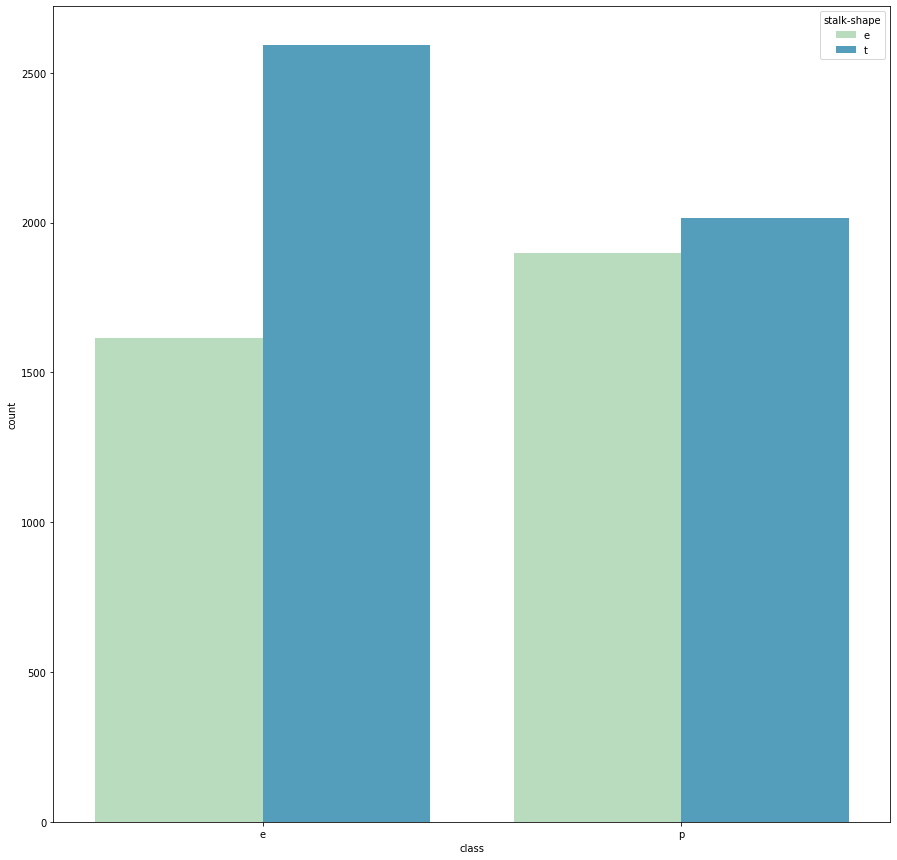

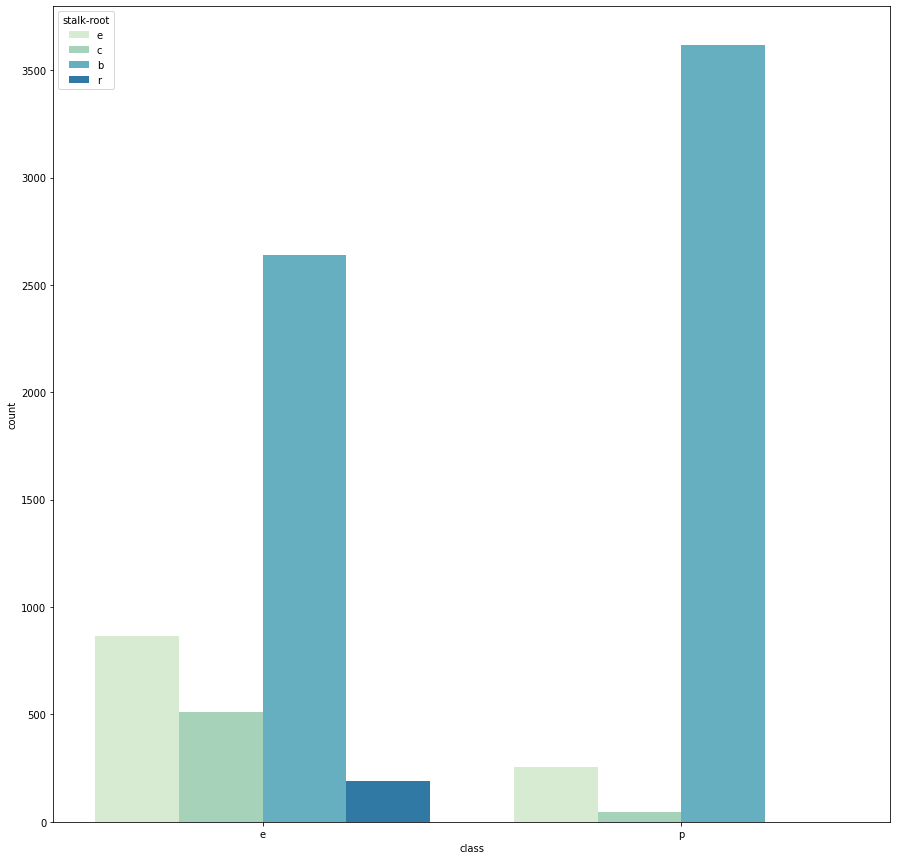

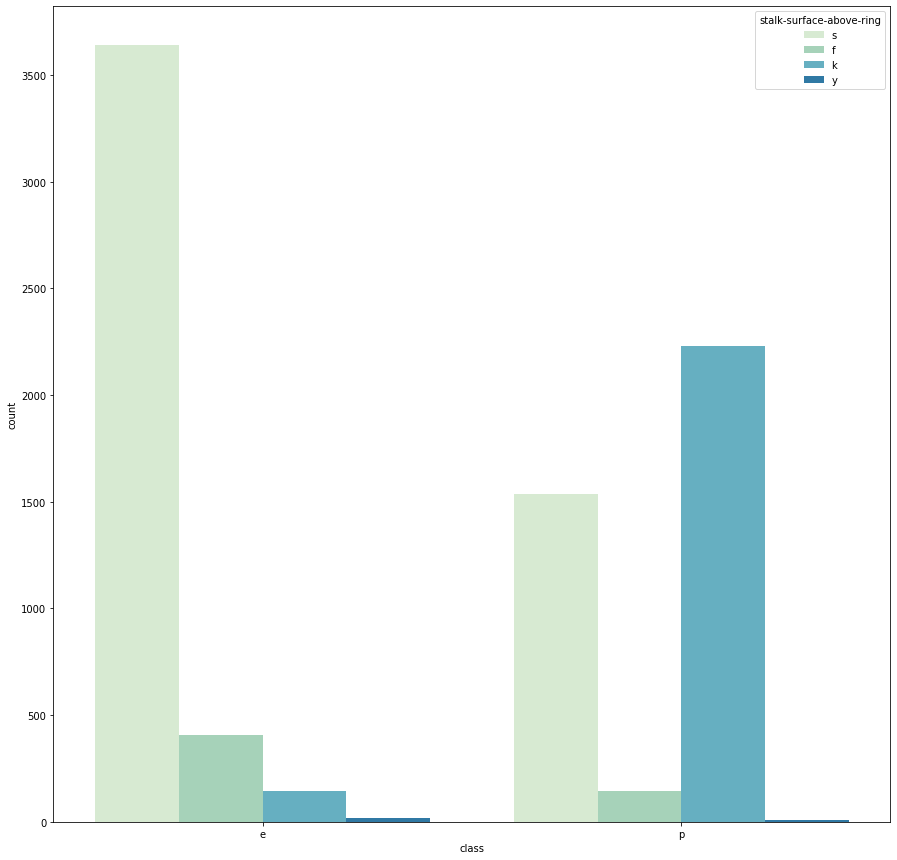

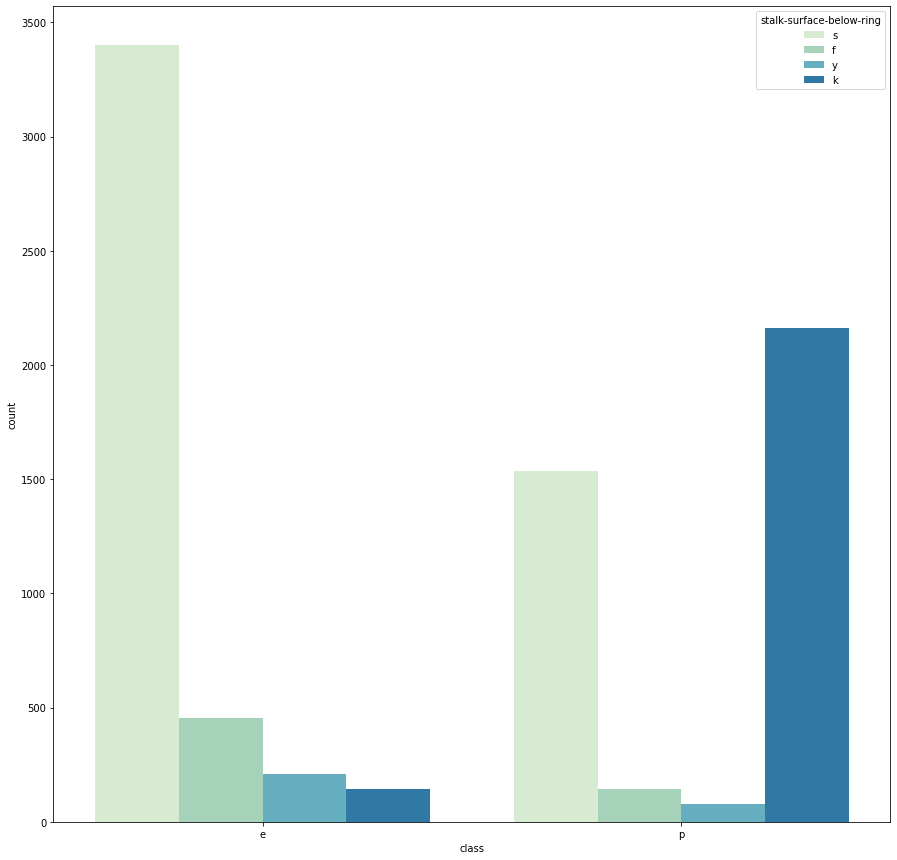

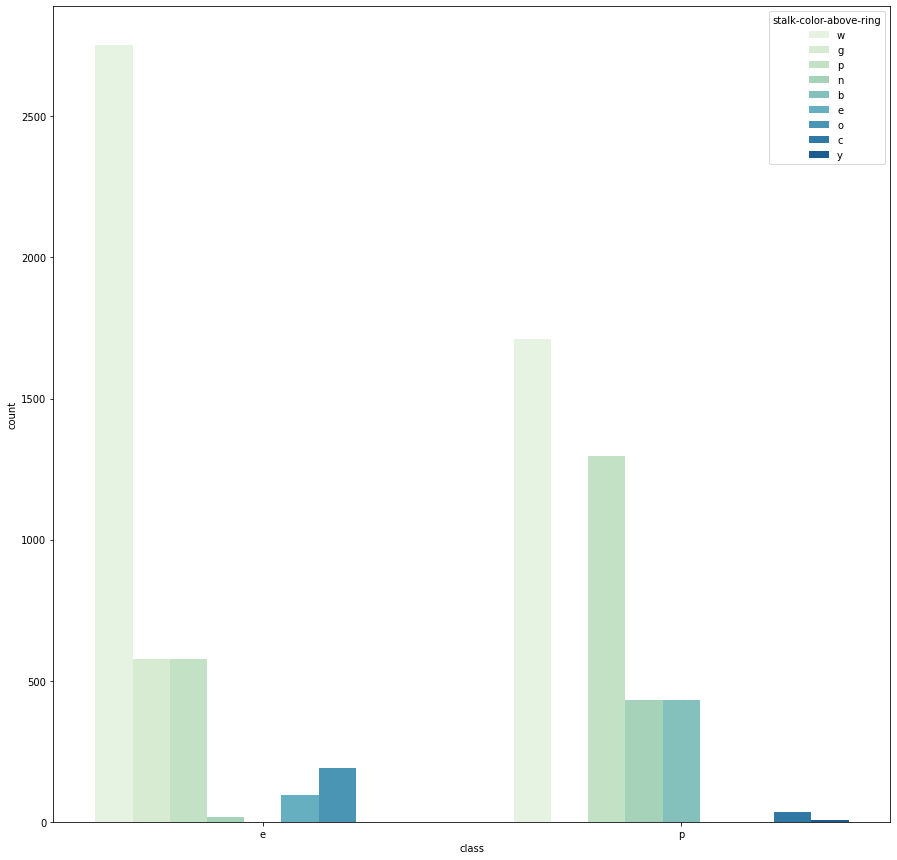

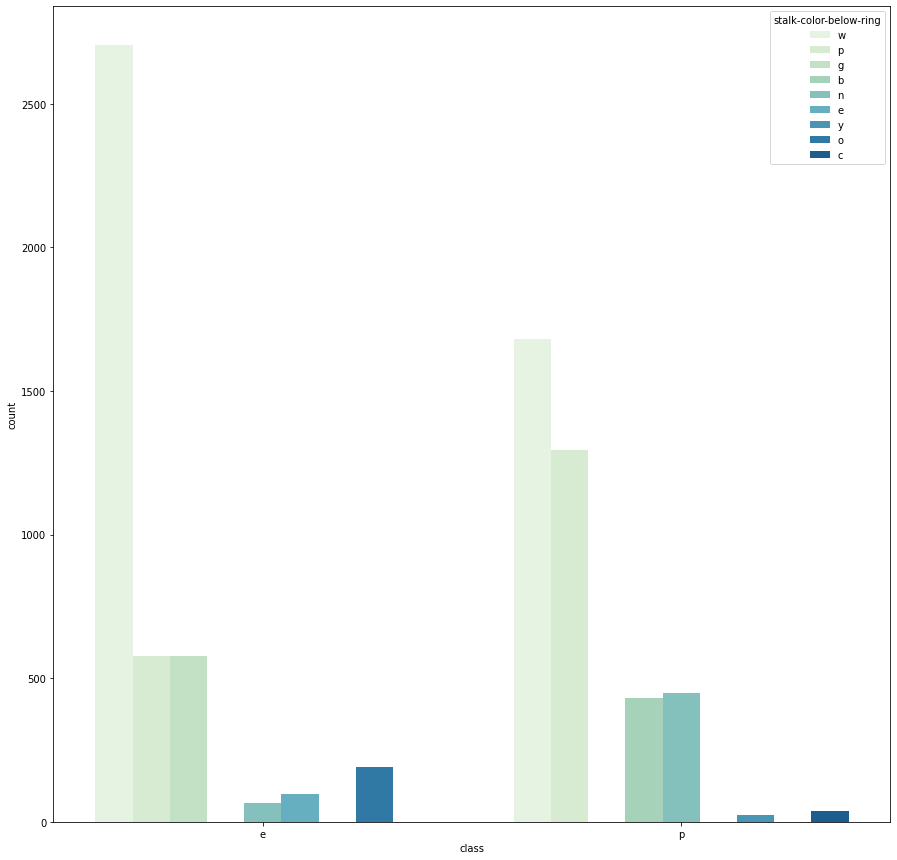

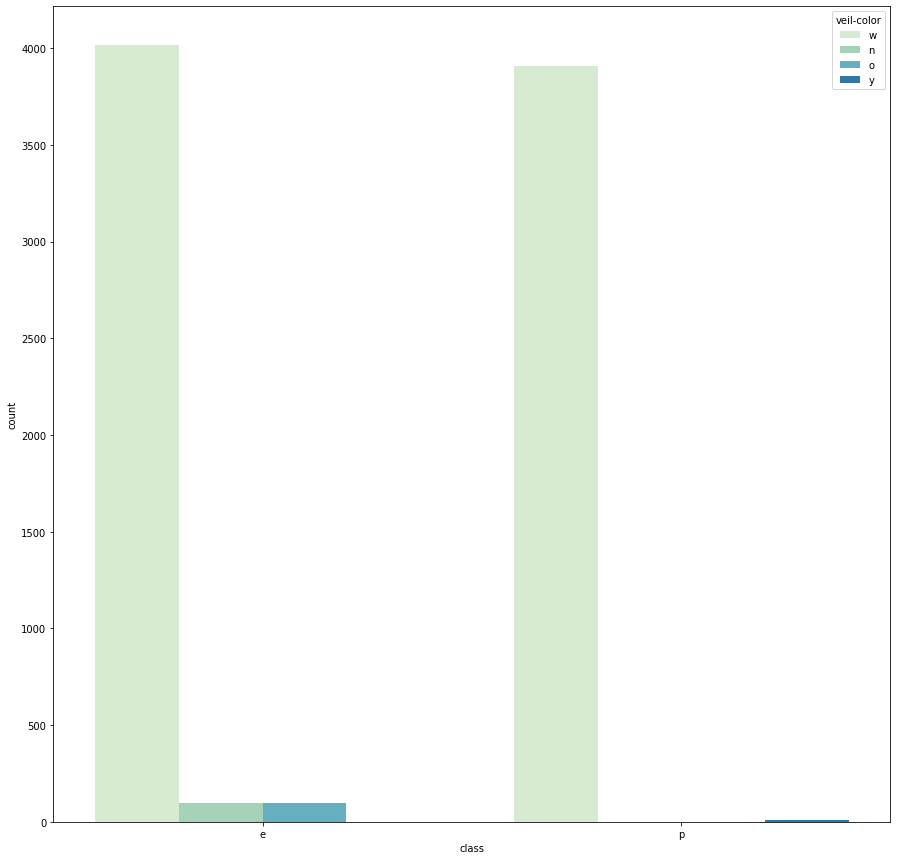

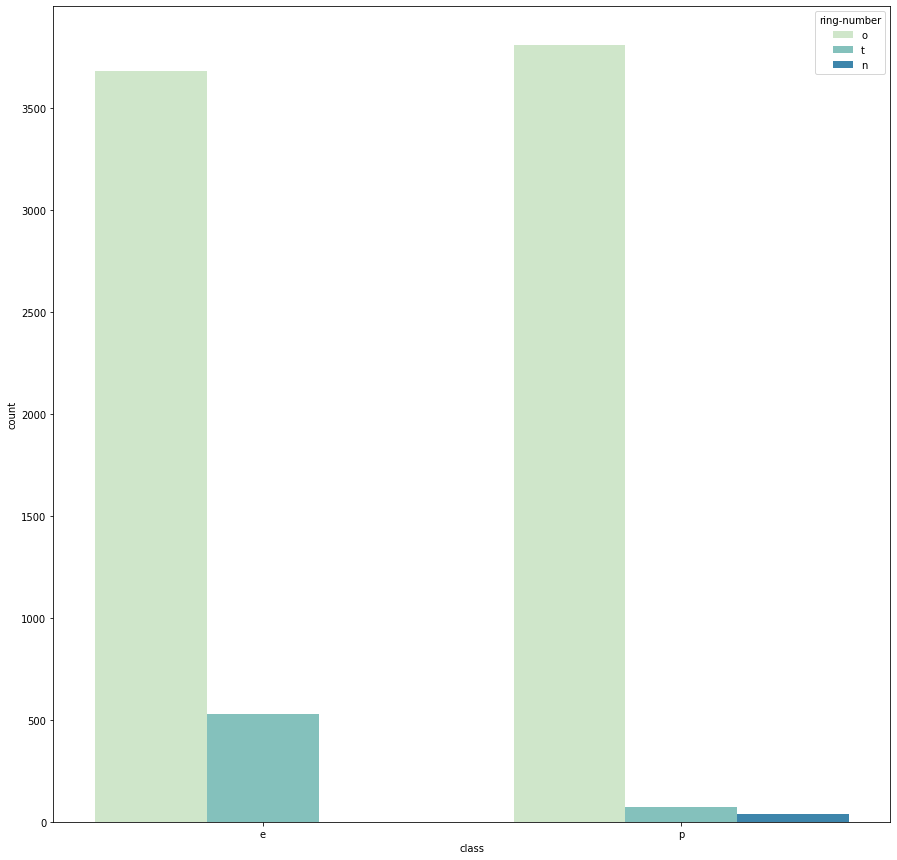

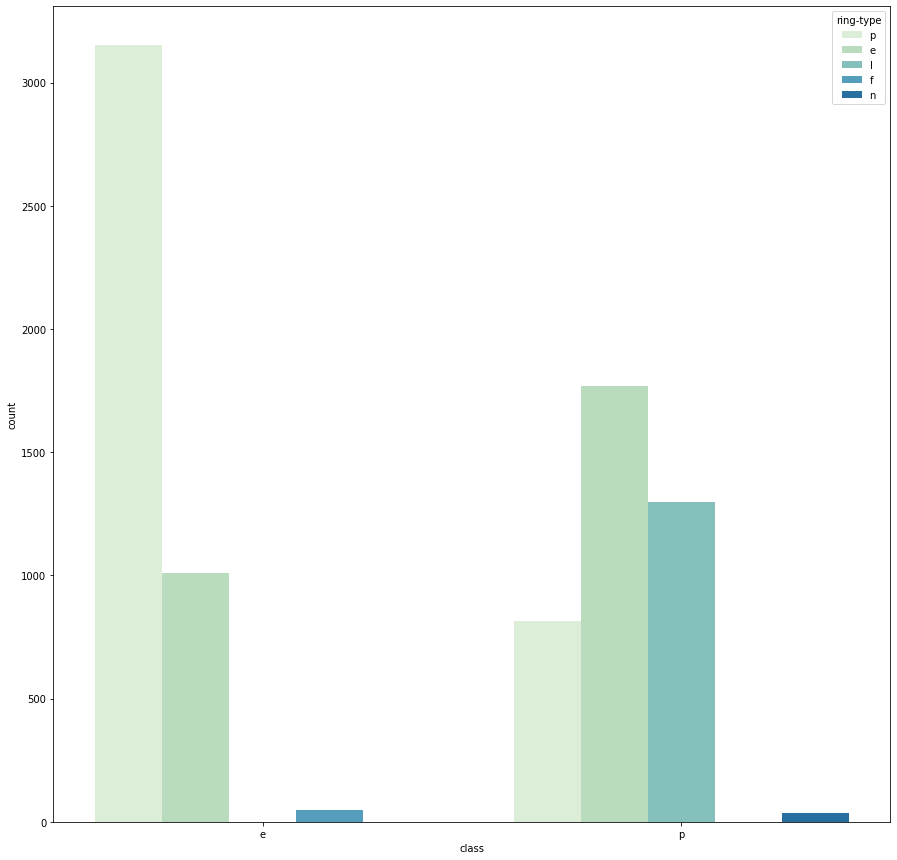

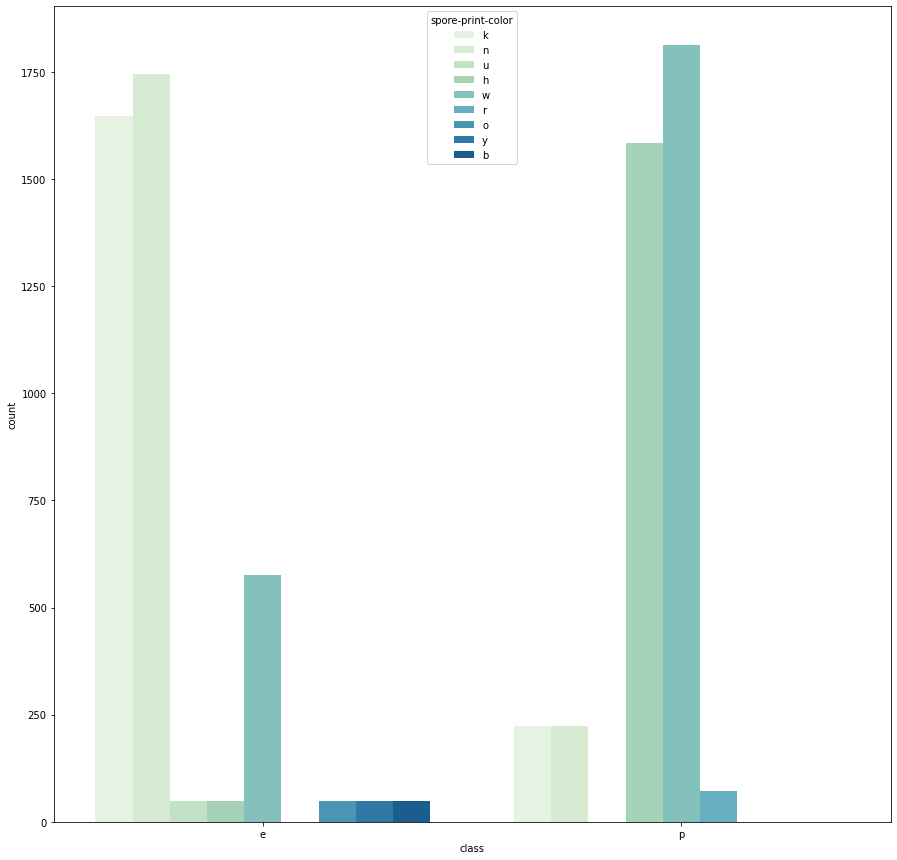

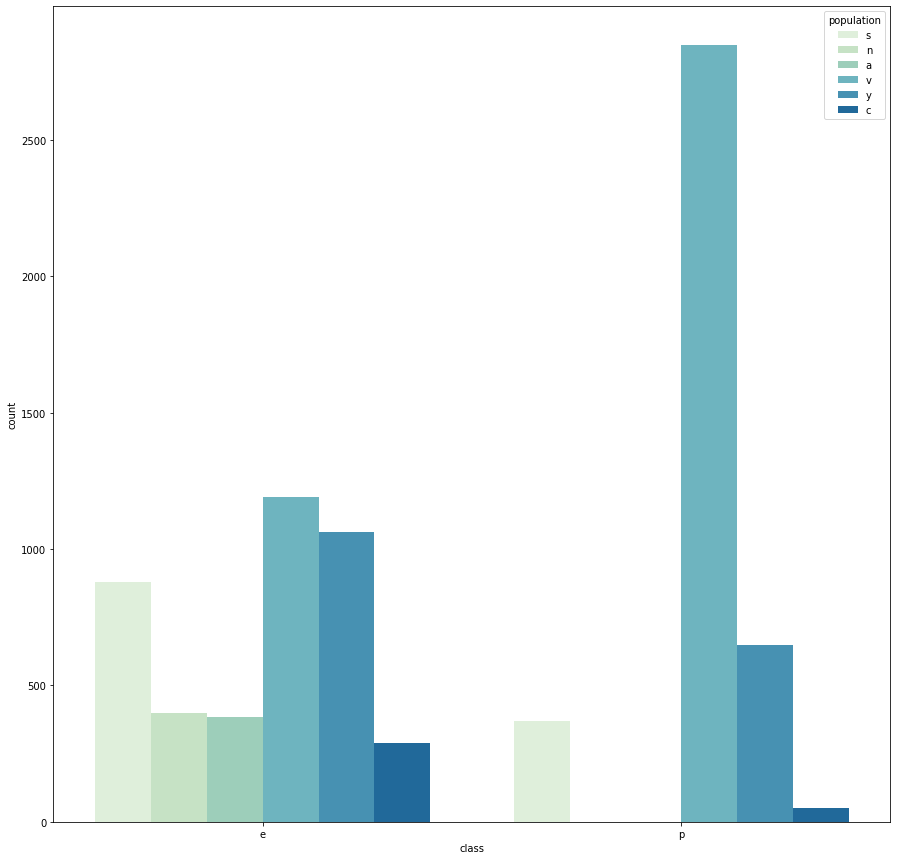

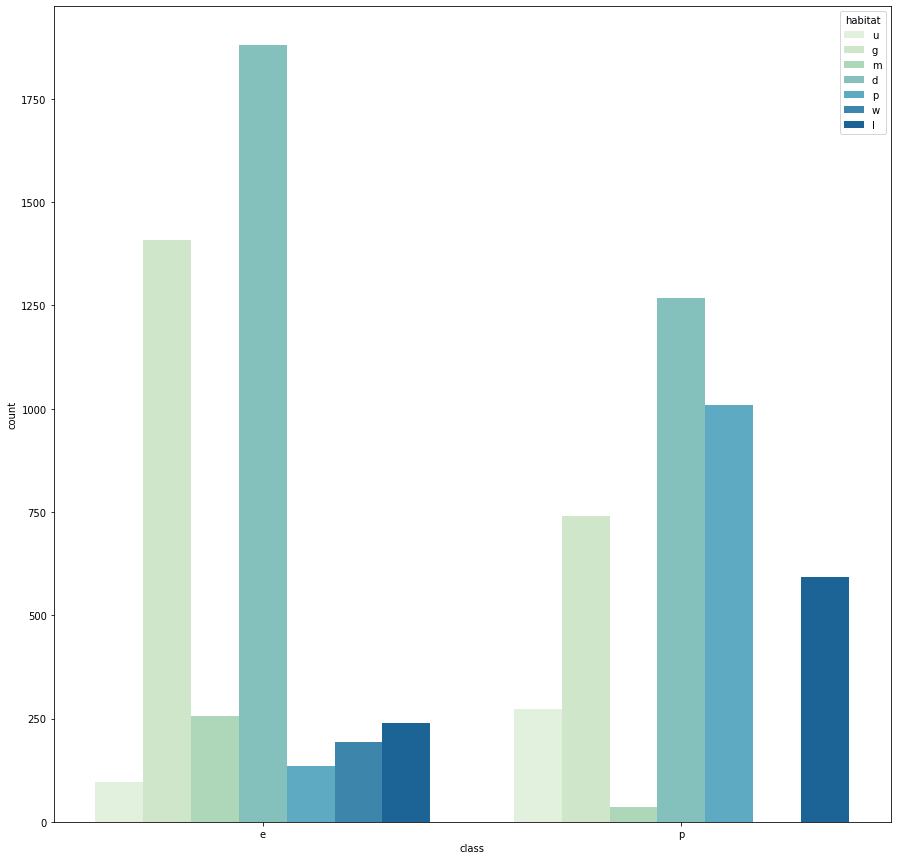

In [ ]:
#multivariate analysi
cat1="class"
for j in df.columns:
  cat2=j
  plt.figure(figsize=(15,15))
  chart=sns.countplot(data=df,x=cat1,hue=cat2,palette='GnBu',order=df[cat1].value_counts().iloc[:10].index)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
y=df['class']
x=df.drop("class",axis=1)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [ ]:
x=pd.DataFrame(enc.fit_transform(x),columns=x.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
pickle.dump(model,open('model.pkl','wb'))

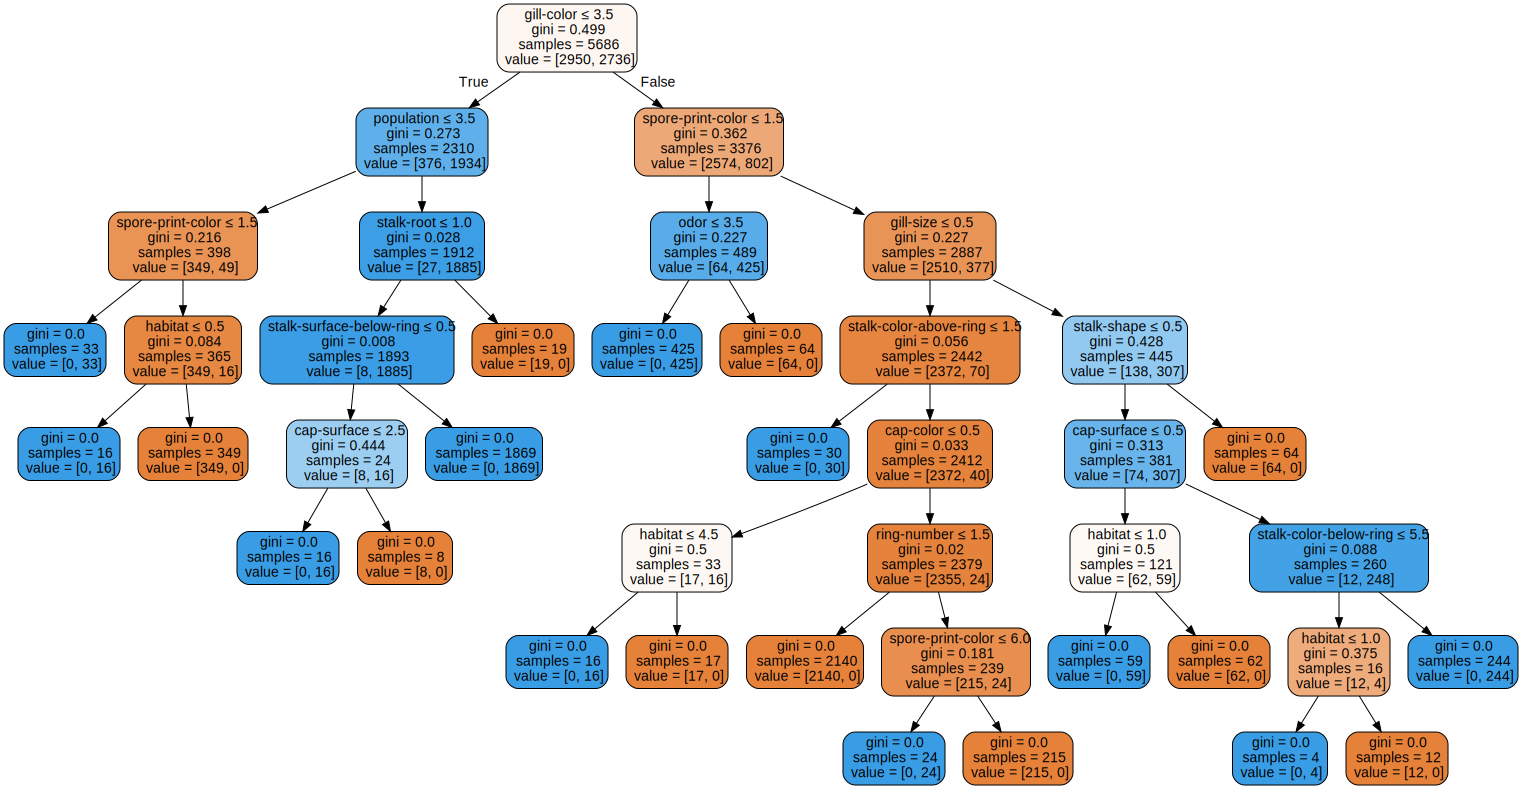

In [ ]:
import os
import graphviz
dot_data = export_graphviz(model, out_file=None,
 feature_names=x.columns,
 filled=True, rounded=True,
 special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
pred=model.predict(X_test)
pob=model.predict_proba(X_test)[:,1]
print_score(model, X_train, Y_train, X_test, Y_test, train=True)
print_score(model, X_train, Y_train, X_test, Y_test, train=False)
f,p,t=roc_curve(Y_test,pob,pos_label='p')

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                e       p  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    2950.0  2736.0       1.0     5686.0        5686.0
_______________________________________________
Confusion Matrix: 
 [[2950    0]
 [   0 2736]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                e       p  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1258.0  1180.0       1.0     2438.0        2438.0
_______________________________________________
Confusion Matrix: 
 [[1258   

In [ ]:
sc=roc_auc_score(Y_test,pob)
sc

1.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(X_train,Y_train)
print_score(model2, X_train, Y_train, X_test, Y_test, train=True)
print_score(model2, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 99.89%
_______________________________________________
CLASSIFICATION REPORT:
                     e            p  accuracy    macro avg  weighted avg
precision     0.999322     0.998539  0.998945     0.998930      0.998945
recall        0.998644     0.999269  0.998945     0.998957      0.998945
f1-score      0.998983     0.998904  0.998945     0.998943      0.998945
support    2950.000000  2736.000000  0.998945  5686.000000   5686.000000
_______________________________________________
Confusion Matrix: 
 [[2946    4]
 [   2 2734]]

Test Result:
Accuracy Score: 99.63%
_______________________________________________
CLASSIFICATION REPORT:
                     e            p  accuracy    macro avg  weighted avg
precision     0.992897     1.000000  0.996308     0.996448      0.996335
recall        1.000000     0.992373  0.996308     0.996186      0.996308
f1-score      0.996436     0.996172  0.996308     0.996304      0.996308
support    1258.000000  1180.000

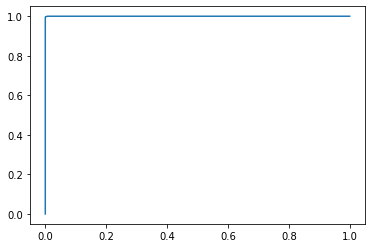

In [ ]:
pob=model2.predict_proba(X_test)[:,1]
f,p,t=roc_curve(Y_test,pob,pos_label='p')
plt.plot(f,p)
plt.show()

In [ ]:
sc=roc_auc_score(Y_test,pob)
sc

0.999986863733125

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(X_train,Y_train)
print_score(model3,X_train,Y_train,X_test,Y_test,train=True)
print_score(model3,X_train,Y_train,X_test,Y_test,train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                e       p  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    2950.0  2736.0       1.0     5686.0        5686.0
_______________________________________________
Confusion Matrix: 
 [[2950    0]
 [   0 2736]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                e       p  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1258.0  1180.0       1.0     2438.0        2438.0
_______________________________________________
Confusion Matrix: 
 [[1258   

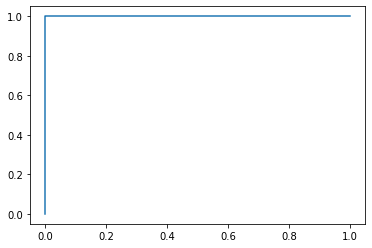

In [ ]:
pob=model3.predict_proba(X_test)[:,1]
f,p,t=roc_curve(Y_test,pob,pos_label='p')
plt.plot(f,p)
plt.show()

In [ ]:
sc=roc_auc_score(Y_test,pob)
sc

1.0

In [ ]:
from sklearn.svm import SVC
model4=SVC(probability=True)
model4.fit(X_train,Y_train)
print_score(model4,X_train,Y_train,X_test,Y_test,train=True)
print_score(model4,X_train,Y_train,X_test,Y_test,train=False)

Train Result:
Accuracy Score: 99.35%
_______________________________________________
CLASSIFICATION REPORT:
                     e            p  accuracy    macro avg  weighted avg
precision     0.988594     0.998891  0.993493     0.993743      0.993549
recall        0.998983     0.987573  0.993493     0.993278      0.993493
f1-score      0.993762     0.993200  0.993493     0.993481      0.993491
support    2950.000000  2736.000000  0.993493  5686.000000   5686.000000
_______________________________________________
Confusion Matrix: 
 [[2947    3]
 [  34 2702]]

Test Result:
Accuracy Score: 99.14%
_______________________________________________
CLASSIFICATION REPORT:
                     e            p  accuracy    macro avg  weighted avg
precision     0.985098     0.998280  0.991386     0.991689      0.991478
recall        0.998410     0.983898  0.991386     0.991154      0.991386
f1-score      0.991709     0.991037  0.991386     0.991373      0.991384
support    1258.000000  1180.000

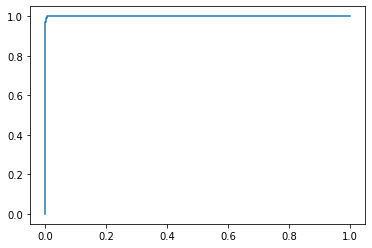

In [ ]:
pob=model4.predict_proba(X_test)[:,1]
f,p,t=roc_curve(Y_test,pob,pos_label='p')
plt.plot(f,p)
plt.show()

In [ ]:
sc=roc_auc_score(Y_test,pob)
sc

0.9999285926005766

In [ ]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('sv',model4),('rf',model3)])
vc.fit(X_train,Y_train)
print_score(vc,X_train,Y_train,X_test,Y_test,train=True)
print_score(vc,X_train,Y_train,X_test,Y_test,train=False)


Train Result:
Accuracy Score: 99.40%
_______________________________________________
CLASSIFICATION REPORT:
                     e            p  accuracy    macro avg  weighted avg
precision     0.988606     1.000000   0.99402     0.994303      0.994089
recall        1.000000     0.987573   0.99402     0.993787      0.994020
f1-score      0.994270     0.993748   0.99402     0.994009      0.994019
support    2950.000000  2736.000000   0.99402  5686.000000   5686.000000
_______________________________________________
Confusion Matrix: 
 [[2950    0]
 [  34 2702]]

Test Result:
Accuracy Score: 99.22%
_______________________________________________
CLASSIFICATION REPORT:
                     e            p  accuracy    macro avg  weighted avg
precision     0.985121     1.000000  0.992207     0.992561      0.992323
recall        1.000000     0.983898  0.992207     0.991949      0.992207
f1-score      0.992505     0.991884  0.992207     0.992194      0.992204
support    1258.000000  1180.000

In [ ]:
from sklearn.ensemble import StackingClassifier
Sc=StackingClassifier(estimators=[("RF",model3),("SVC",model4)],final_estimator=model2)
Sc.fit(X_train,Y_train)
Sc.score(X_test,Y_test)

1.0